## CSA PLOTS

Libraries

In [1]:
import scipy.signal as signal
import matplotlib.pyplot as plt
import numpy as np
import mne
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm

Read EEG data and generate epochs using Welch's method

In [2]:
raw = mne.io.read_raw_eeglab("D:/EEGs/PhD_datasets/BIDS/finland/sub-001/eeg/sub-001_task-rest_eeg.set", preload = True)
epochs = mne.make_fixed_length_epochs(raw, duration=2, preload=True)
srate = epochs.info['sfreq'] # Get the sampling rate
f, periodogram = signal.welch(epochs._data[:,:,:], fs=srate, nperseg=srate*2, window='hann', scaling='spectrum') # Get power spectral density using Welch's method
print(epochs.info["ch_names"])

Not setting metadata
Not setting metadata
77 matching events found
No baseline correction applied
0 projection items activated
Loading data for 77 events and 1000 original time points ...
0 bad epochs dropped
['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Iz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'FT9', 'FT10', 'TP9', 'TP10', 'HEOG', 'VEOG', 'F1', 'F2', 'C1', 'C2', 'P1', 'P2', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'AF7', 'AF8', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'Fpz', 'CPz', 'POz', 'Oz']


Select the channel and plot CSA

In [3]:
channel = epochs.ch_names.index('O2') ### Replace here the channel name you want to plot, 'O2' in this example

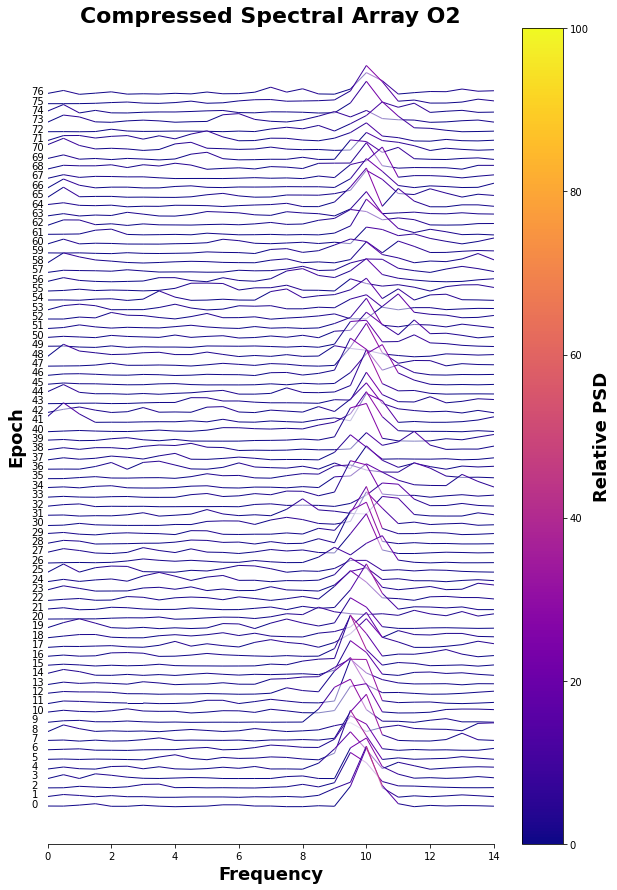

In [4]:
channel_plot = channel
channel_name = epochs.ch_names[channel_plot]

x = f
Nx = x.shape[0]

total_power = np.sum(periodogram,axis=-1)

num_epochs = periodogram.shape[0]
Nz = num_epochs
y1 = periodogram[:,channel_plot,:].T 

y = (y1/total_power[:,channel_plot])*100 


# Create CSA plot
fig = plt.figure(figsize=(10,15)) ### Change the size of the figure
ax = fig.add_subplot(111)
for side in ['right', 'top', 'left']:
    ax.spines[side].set_visible(False)
    
# Some usefull parameters
highest = 100  # This value can be set as the max power by replacing "highest = 100" for "highest = np.max(y)"
lowest = np.min(y)
delta = highest-lowest
t = np.sqrt(abs(delta))/1.5 # Change denominator in "t" to set the tuning parameter for the offset of each periodogram. Higher values produces higher hills
bottom = lowest*np.ones(Nx)

for i in np.flip(range(Nz)):
    yi_ = y[:,i]       # the periodogram data
    yi = yi_ + i*t   # shifted periodogram using the selected tuning parameter for plotting
    zindex = Nz-i # used to set zorder

    # fill with white from the (shifted) y data down to the lowest value
    # for good results, don't make the alpha (TRANSPARENCY) too low, otherwise you'll get confusing blending of lines
    ax.fill_between(x, lowest, yi, facecolor="white", alpha=0.5, zorder=zindex)

    # cut the data into segments that can be colored individually
    points = np.array([x, yi]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)

    # Create a continuous norm to map from data points to colors
    norm = plt.Normalize(lowest, highest)
    lc = LineCollection(segments, cmap='plasma', norm=norm)
    
    # Set the values used for colormapping
    lc.set_array(yi_)
    lc.set_zorder(zindex)
    lc.set_linewidth(1)
    line = ax.add_collection(lc)
    
    # print text indicating epochs number
    delta_x = max(x)-min(x)
    if (i)%1==0:
        ax.text(min(x)-0.5, t*i, "%i"%i)

ax.set_xlim(0, 14) # set Frequency limits (in Hz) to plot

psd_colorbar = fig.colorbar(line, ax=ax)
psd_colorbar.set_label( label = 'Relative PSD', size = 18, weight='bold')


ax.set_title('Compressed Spectral Array -' + str(channel_name), size=22, fontweight="bold")
plt.yticks([])
ax.set_ylabel('Epoch', size=18, fontweight="bold")
ax.set_xlabel('Frequency', size=18, fontweight="bold")
ax.yaxis.set_label_coords(-0.05, 0.5)
ax.yaxis.set_ticks_position('none')

#### Black and white CSA

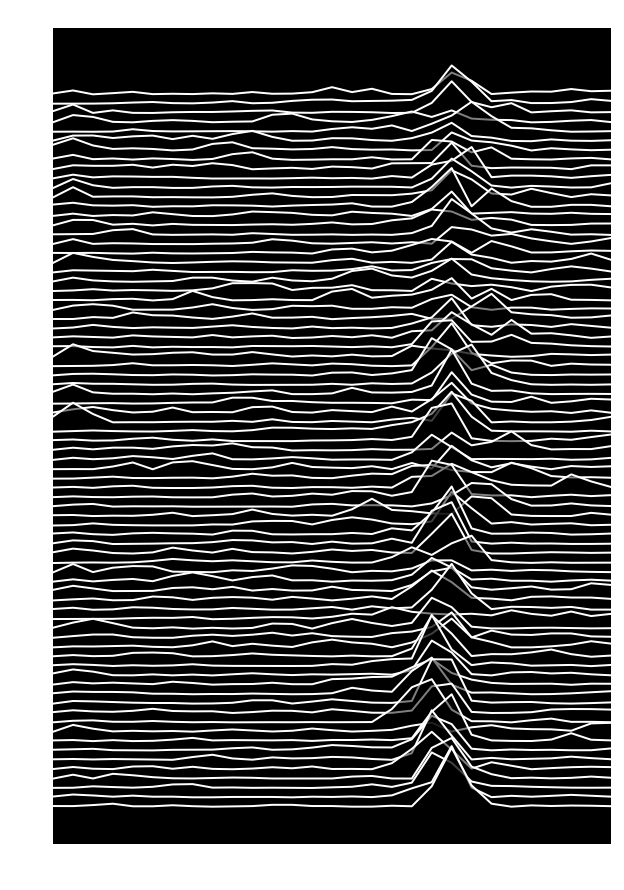

In [5]:
channel_plot = channel  
channel_name = epochs.ch_names[channel_plot]

x = f
Nx = x.shape[0]

total_power = np.sum(periodogram,axis=-1)

num_epochs = periodogram.shape[0]
Nz = num_epochs
y1 = periodogram[:,channel_plot,:].T 

y = (y1/total_power[:,channel_plot])*100 


# Create CSA plot
fig = plt.figure(figsize=(10,15)) ### Change the size of the figure
plt.style.use('dark_background')
ax = fig.add_subplot(111)
for side in ['right', 'top', 'left']:
    ax.spines[side].set_visible(False)
    
# Some usefull parameters
highest = 100  # This value can be set as the max power by replacing "100" for "np.max(y)"
lowest = np.min(y)
delta = highest-lowest
t = np.sqrt(abs(delta))/1.5 # Change denominator in "t" to set the tuning parameter for the offset of each periodogram. Higher values produces higher hills
bottom = lowest*np.ones(Nx)

for i in np.flip(range(Nz)):
    yi = y[:,i] + i*t
    zindex = Nz-i
    ax.fill_between(x, lowest, yi, facecolor="black", alpha=0.5, zorder=zindex)
    ax.plot(x, yi, c="white", zorder=zindex, lw=2)
  
  # print text indicating epochs number
    delta_x = max(x)-min(x)
    if (i)%1==0:
        ax.text(min(x)-0.5, t*i, "%i"%i)



plt.rcParams.update({'font.family':'Helvetica'})
ax.set_xlim(0, 14) # set Frequency limits (in Hz) to plot

ax.set_title('Compressed Spectral Array - ' + str(channel_name), size=22, fontweight="bold")
plt.yticks([])
ax.set_ylabel('Epochs', size=18, fontweight="bold")
ax.set_xlabel('Frequency (Hz)', size=18, fontweight="bold")
ax.yaxis.set_label_coords(-0.05, 0.5)
ax.yaxis.set_ticks_position('none')